In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = make_blobs(n_samples=200,
               n_features=2,
               centers=4,
               cluster_std=1.6,
               random_state=42)
df

(array([[ 7.62511805e+00,  2.73130236e+00],
        [-6.70078979e+00,  1.03293301e+01],
        [-8.85792259e+00,  5.88791592e+00],
        [-1.11552627e+01,  5.07158088e+00],
        [-7.82261080e+00, -5.52074624e+00],
        [-5.68395742e+00, -5.90351717e+00],
        [ 4.33210129e+00,  2.45564543e+00],
        [-9.59198905e+00,  7.69480282e+00],
        [ 4.21642790e+00,  6.32544035e+00],
        [-5.57904780e+00, -5.87270345e+00],
        [-8.36271595e+00, -6.97535016e+00],
        [ 5.00381473e+00,  4.06459809e+00],
        [ 6.37276083e+00,  3.65925297e+00],
        [-7.65620887e+00, -6.74911097e+00],
        [-1.01198553e+01, -6.58178269e+00],
        [-8.20601921e+00, -7.77639926e+00],
        [-2.62441382e+00,  1.06199388e+01],
        [-1.01538804e+01,  7.71342245e+00],
        [-5.78161089e+00, -9.46045499e+00],
        [-4.34200029e+00, -8.86061439e+00],
        [-3.48417728e+00, -5.22816518e+00],
        [-7.63953969e+00, -7.92543637e+00],
        [-8.32197806e+00,  5.999

##### as we can see it created a label input, but we doesn't need o/p feature for clustering, so we only take 0th part of df

In [5]:
points = df[0]
points.shape

(200, 2)

In [6]:
df[1]

array([1, 0, 3, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2,
       3, 0, 3, 0, 0, 2, 0, 1, 2, 2, 3, 3, 0, 1, 3, 1, 3, 0, 2, 0, 2, 2,
       3, 1, 1, 2, 1, 0, 3, 0, 3, 1, 0, 0, 2, 2, 0, 1, 3, 1, 2, 3, 3, 2,
       1, 0, 3, 0, 0, 3, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 3, 3, 3, 3, 0,
       1, 3, 2, 0, 1, 1, 1, 3, 0, 1, 2, 0, 3, 3, 0, 2, 0, 1, 3, 2, 2, 3,
       1, 2, 0, 3, 0, 3, 3, 0, 0, 0, 3, 2, 1, 3, 3, 1, 0, 1, 1, 0, 2, 2,
       0, 3, 3, 1, 2, 2, 0, 2, 1, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 3, 1, 3,
       2, 3, 3, 1, 1, 1, 0, 1, 1, 3, 0, 2, 1, 1, 2, 1, 3, 0, 2, 2, 1, 2,
       1, 0, 0, 2, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 0, 2, 3, 3, 0, 3, 1, 0,
       2, 1])

### As we already know there are 4 clusters we can plot a elbow curve and check

In [7]:
from sklearn.cluster import KMeans

wss=[]
K=range(1,15)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(points)
    wss.append(kmeans.inertia_)

Text(0.5, 1.0, 'SCREW PLOT')

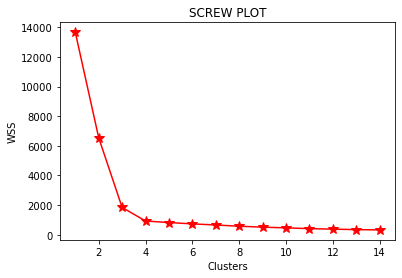

In [9]:
plt.plot(K, wss, 'r*-', markersize=10)
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.title('SCREW PLOT')

## As we can see elbow curve is on k=4, so we select no of clusters=4

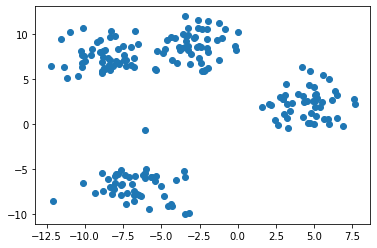

In [10]:
plt.scatter(df[0][:,0],df[0][:,1])    # plotting the df i/p labels only

In [11]:
# fitting kmeans to 4

kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

KMeans(n_clusters=4)

In [13]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[-2.73756192,  8.80555885],
       [-6.6786171 , -6.89505223],
       [ 4.55059552,  2.24512923],
       [-8.65709326,  7.51452043]])

In [14]:
cluster_predict = kmeans.fit_predict(points)
cluster_predict

array([2, 3, 3, 3, 0, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       3, 1, 3, 1, 1, 0, 1, 2, 0, 0, 3, 3, 1, 2, 3, 2, 3, 1, 0, 1, 0, 0,
       3, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 0, 0, 1, 2, 3, 2, 0, 3, 3, 0,
       2, 1, 3, 1, 1, 3, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 3, 3, 3, 3, 1,
       2, 3, 0, 1, 2, 2, 2, 3, 1, 2, 0, 1, 3, 3, 1, 0, 1, 2, 3, 0, 0, 3,
       2, 0, 1, 3, 1, 3, 3, 1, 1, 1, 3, 0, 2, 3, 3, 2, 1, 2, 2, 1, 0, 0,
       1, 3, 3, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 3, 0, 0, 1, 3, 2, 3,
       0, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1, 0, 2, 2, 0, 2, 3, 1, 0, 0, 2, 0,
       2, 1, 1, 0, 1, 0, 3, 3, 3, 1, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 2, 1,
       0, 2])

In [17]:
points[cluster_predict==0,0]

array([ -7.8226108 ,  -5.68395742,  -5.5790478 ,  -8.36271595,
        -7.65620887, -10.11985533,  -8.20601921,  -5.78161089,
        -4.34200029,  -3.48417728,  -7.63953969,  -7.12248334,
        -9.31061914,  -3.17617348,  -8.80010144,  -8.45004103,
        -4.2677691 ,  -6.76794386,  -3.46677379,  -7.28373623,
        -5.44026739,  -6.56113168,  -7.93848553,  -6.05557076,
        -6.05555089, -12.06565494,  -6.80671225,  -6.16951611,
        -7.21262279,  -7.38405798,  -5.01856519,  -6.07164754,
        -4.05490041,  -5.35322437,  -6.91306974,  -6.77677916,
        -3.44931665,  -4.85256935,  -6.69799944,  -7.58369837,
        -8.11614753,  -5.96620237,  -6.4300402 ,  -8.02411313,
        -6.30840241,  -4.57358993,  -8.89704152,  -8.14766037,
        -8.0482138 ,  -7.63471818])

In [21]:
points[cluster_predict==3,0]

array([ -6.70078979,  -8.85792259, -11.1552627 ,  -9.59198905,
       -10.15388039,  -8.32197806,  -7.747203  , -11.579343  ,
       -10.15912327,  -8.17763743,  -8.44638124, -10.14748085,
        -5.33464306,  -6.95122356,  -7.31764962,  -8.86875369,
        -7.44261474,  -7.27813618,  -8.47977979,  -8.31966159,
        -8.68313421,  -7.96297195,  -8.82993784,  -9.18661768,
        -9.98783851,  -6.74956167,  -9.55843251,  -8.00737333,
       -11.38941201,  -7.73409737, -12.23656092,  -6.51649798,
        -5.39323582,  -8.71704046,  -8.2915182 ,  -8.79911148,
       -10.1818827 , -10.95070089,  -7.46607236,  -8.86794877,
        -9.02159151,  -6.98535036, -10.44795557,  -9.01234399,
        -6.79406392,  -8.682046  ,  -7.83973605,  -7.5176616 ,
       -10.27579123, -10.05294002,  -8.34087565])

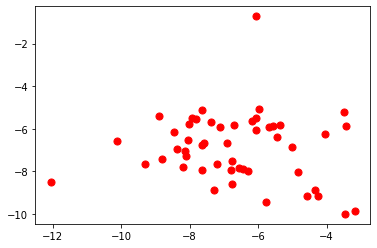

In [18]:
plt.scatter(points[cluster_predict==0,0], points[cluster_predict==0,1], s=50, color='red')

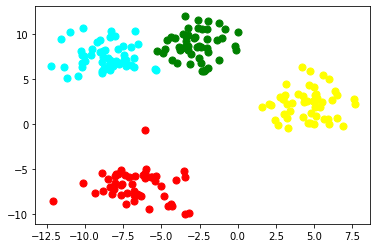

In [20]:
plt.scatter(points[cluster_predict==0,0], points[cluster_predict==0,1], s=50, color='red')
plt.scatter(points[cluster_predict==1,0], points[cluster_predict==1,1], s=50, color='green')
plt.scatter(points[cluster_predict==2,0], points[cluster_predict==2,1], s=50, color='yellow')
plt.scatter(points[cluster_predict==3,0], points[cluster_predict==3,1], s=50, color='cyan')

## Just like above scatter plot of points in line 10 we got same scatter plot with clustered into 4, now lets plot centers, as there is only 2 features we are plotting for 0 and 1

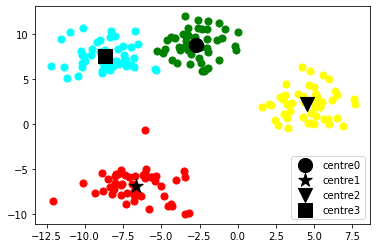

In [27]:
plt.scatter(points[cluster_predict==0,0], points[cluster_predict==0,1], s=50, color='red')
plt.scatter(points[cluster_predict==1,0], points[cluster_predict==1,1], s=50, color='green')
plt.scatter(points[cluster_predict==2,0], points[cluster_predict==2,1], s=50, color='yellow')
plt.scatter(points[cluster_predict==3,0], points[cluster_predict==3,1], s=50, color='cyan')

plt.scatter(cluster_centres[0,0], cluster_centres[0,1], s=200, color='black', label='centre0')
plt.scatter(cluster_centres[1,0], cluster_centres[1,1], s=200, marker='*', color='black',label='centre1')
plt.scatter(cluster_centres[2,0], cluster_centres[2,1], s=200, marker='v', color='black',label='centre2')
plt.scatter(cluster_centres[3,0], cluster_centres[3,1], s=200, marker='s', color='black',label='centre3')

plt.legend(loc=4)